# Heart Disease Prediction using Machine Learning

## Overview
In this project we will be developing a machine learning model to predict if a person has heart disease or not (binary classification).

We will use a dataset to train our model then we will test our model with a test dataset.

It is important to note that the dataset does not have any missing values.

## 4 Steps of Framework
1. Problem Statement
2. Data
3. Evaluation
4. Features

### 1. Problem Statement
Predicting Heart Disease in a patient.

### 2. Data
Dataset is taken from [Heart Disease Dataset | kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

### 3. Evaluation

Evaluation Metrics are focused on `accuracy`. However, precision, recall, and F1 score are also of utmost importance.

### 4. Features

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Steps of the project
1. Data Collection (Gathering and Ensuring Quality of Data)
2. Data Preparation (Data Cleaning and Feature Engineering)
3. Model Selection (Choosing Algorithm and Splitting Data)
4. Model Training (Hyperparameters and Training)
5. Model Evaluation (Performance Assessment and Cross Validation)
6. Model Deployment (Saving and Using for loading)
7. Model Maintenance (Performance Monitoring and Updating Model with Version Control)

we will first start by importing dataset, then we will split the dataset into train and test dataset, then we will train the model and finally we will test the model with test dataset.

as the dataset has limited samples, following metrics will be used to evaluate the model.

> an accuracy of 80% + is acceptable.

> with over 85% we admire it. 

> over 88% is appreciatvie.


## 0. Importing Important Frameworks and Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

## 1. Data Collection

we will start by importing the dataset with pandas, and we will visualize the dataset.

Data is taken from UCI Machine Learning Repository about heart disease.

In [83]:
dataset = pd.read_csv("data/heart-disease.csv")     # importing dataset
len(dataset)   # total number of records in the dataset

303

### Exploratory Data Analysis (EDA) is checking and getting used to data, making sure we have a good understanding of the data.

In [84]:
dataset.head()  # first 5 records of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
dataset.tail()  # last 5 records of dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [86]:
dataset.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

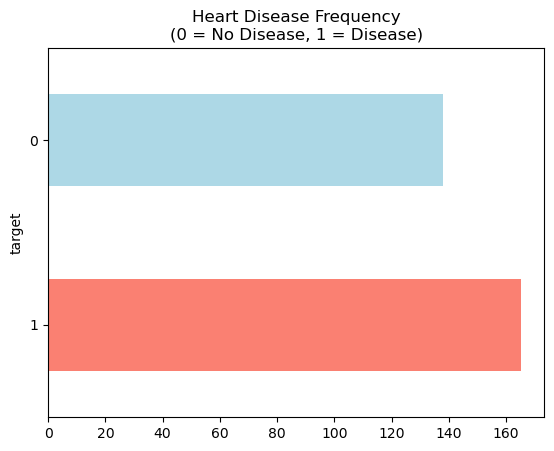

In [87]:
dataset['target'].value_counts().plot(kind="barh", 
                                      color=["salmon", "lightblue"], 
                                      title="Heart Disease Frequency\n(0 = No Disease, 1 = Disease)");

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

hence there are no missing values

In [90]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [91]:
dataset.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

the dataset is male-dominated

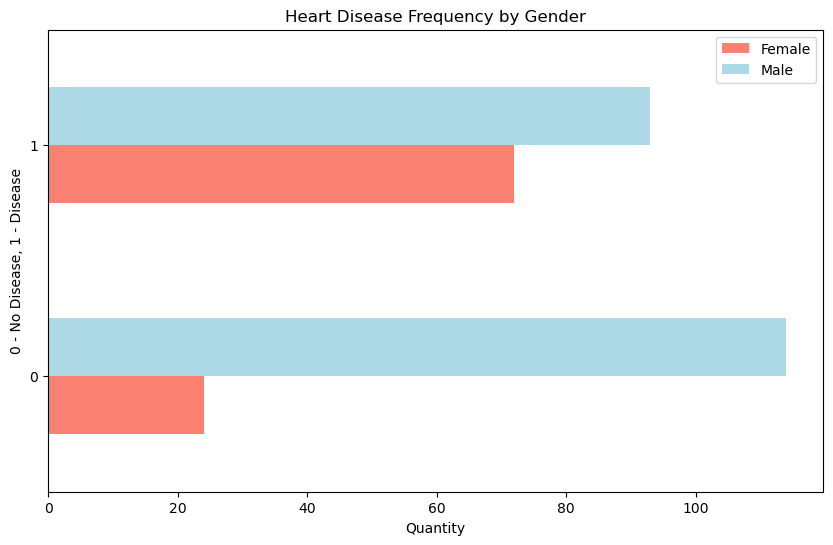

In [92]:
pd.crosstab(dataset.target, dataset.sex).plot(kind="barh", 
                                              figsize=(10, 6), 
                                              color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency by Gender")
plt.ylabel("0 - No Disease, 1 - Disease")
plt.xlabel("Quantity")
plt.legend(["Female", "Male"]);

In [93]:
dataset["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

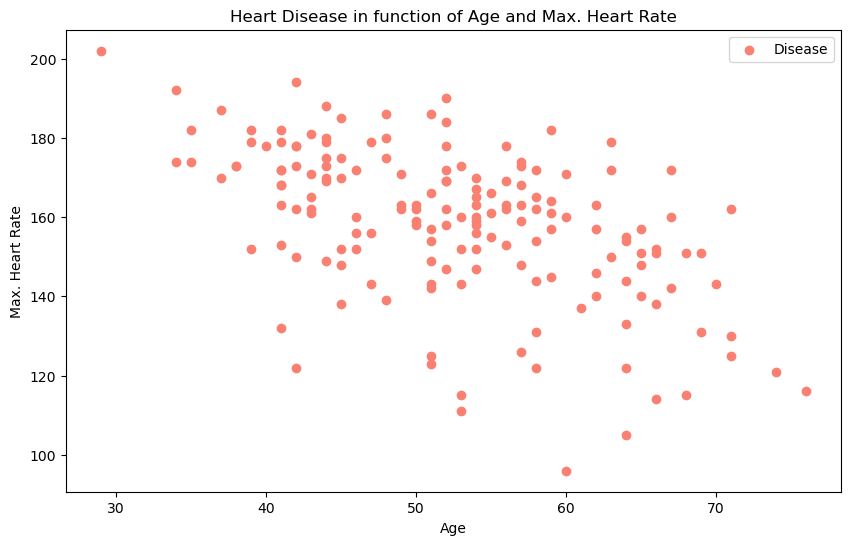

In [94]:
plt.figure(figsize=(10, 6))

plt.scatter(x=dataset.age[dataset.target==1], 
            y=dataset.thalach[dataset.target==1], 
            c="salmon")

plt.title("Heart Disease in function of Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease", "No Disease"]);

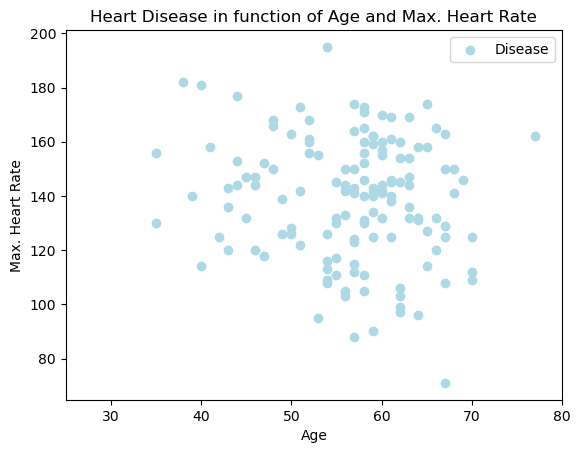

In [95]:
plt.scatter(x=dataset.age[dataset.target==0], 
            y=dataset.thalach[dataset.target==0], 
            c="lightblue")

plt.xlim(25, 80)

plt.title("Heart Disease in function of Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease", "No Disease"]);

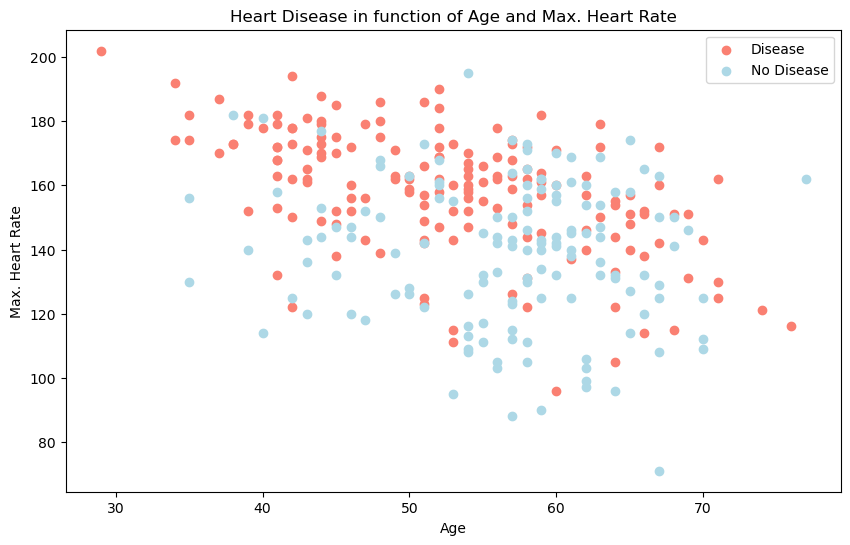

In [96]:
# combined plots
plt.figure(figsize=(10, 6))

plt.scatter(x=dataset.age[dataset.target==1], 
            y=dataset.thalach[dataset.target==1], 
            c="salmon")

plt.scatter(x=dataset.age[dataset.target==0], 
            y=dataset.thalach[dataset.target==0], 
            c="lightblue")

plt.title("Heart Disease in function of Age and Max. Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease", "No Disease"]);

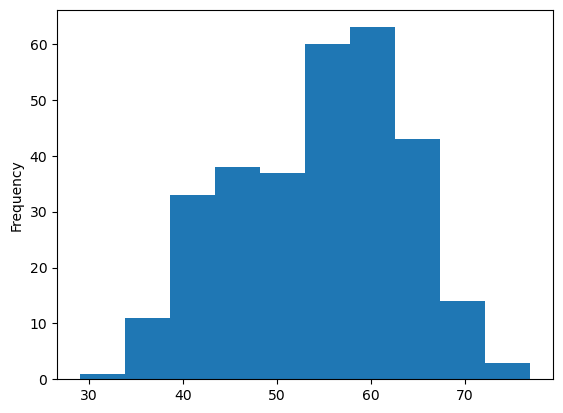

In [97]:
# distribution plot
dataset.age.plot.hist();

#### comparing chest pain type to heart disease

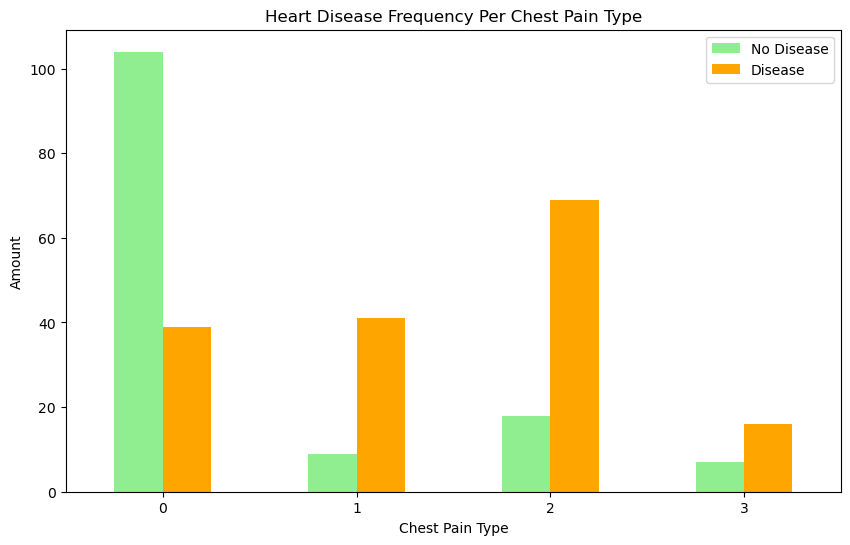

In [98]:
pd.crosstab(dataset.cp, dataset.target).plot(kind="bar", 
                                             figsize=(10, 6), 
                                             color=["lightgreen", "orange"]);

# customize
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

#### Correlation Matrix

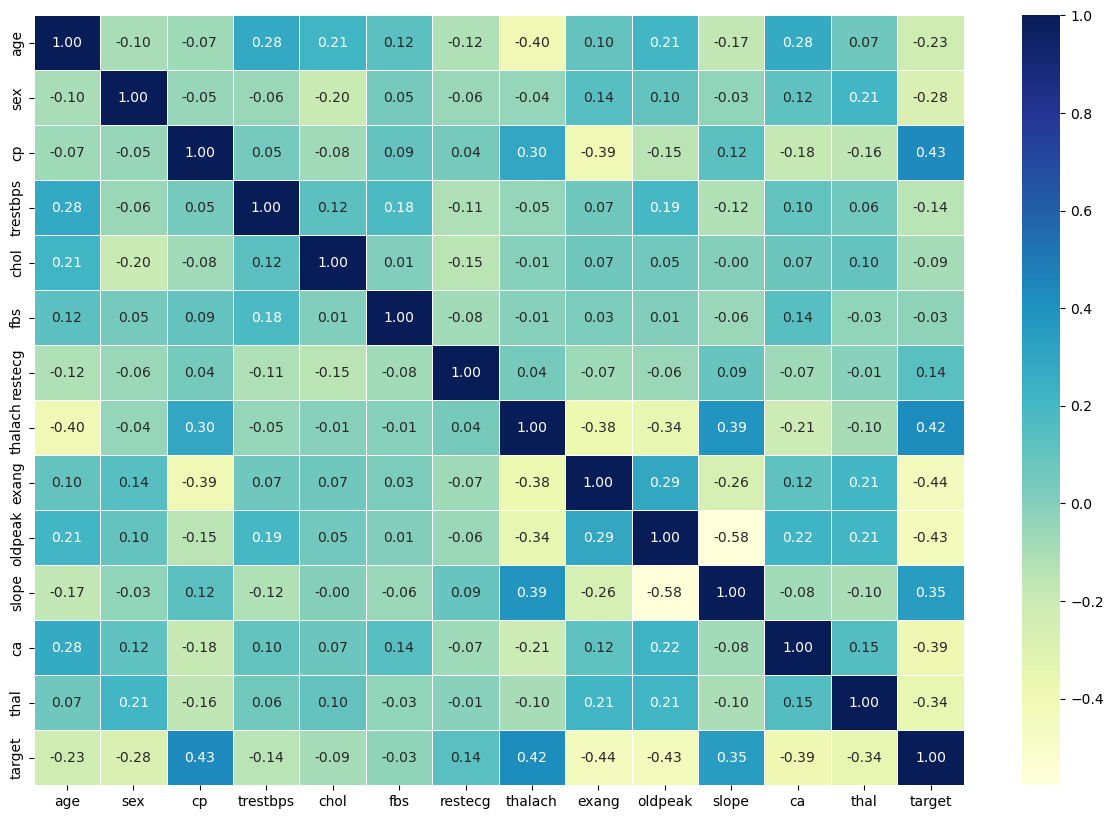

In [99]:
# correlation matrix
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

we can infer that based on existing dataset, about 75% of women are more likely to have heart disease, while about 60% of men are more likely to have heart disease.

our dataset contains a lot of information about the patients. 

However, the `target` column is our target variable that we need to predict. It shows if the patient has heart disease or not. 

All the other variables are the `features` of the patient, or the `feature variables`, these will help us in predicting the target variable.

## 2. Data Preparation

In this phase we will prepare our data by cleaning and feature engineering.

In simple words, we will convert it into a form where we can easily process it.

In [100]:
# separating features and target
X = dataset.drop("target", axis=1)  # X denote the features
y = dataset["target"]                # y denote the target

In [101]:
# displaying features
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [102]:
# displaying target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [103]:
# dividing the dataset into training and testing
from sklearn.model_selection import train_test_split

# setting random seed
np.random.seed(42)  # setting up a random seed makes sure that even if you run the code multiple times or at separate devices, the results are the same.

# splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Model Selection

Here we will select which model is suitable for our project.

For help, we can refer to [Scikit-Learn machine learning map](https://scikit-learn.org/stable/machine_learning_map.html)

<img src = "images/ml_map.svg" width = "800" height = "500">

From the above map we can select the model that we want to use.

For our specific problem, we have a more than 50 samples, and we are predicting a category (classification problem), and we also have labeled data. So, we are now inside the classification box. Since our samples are much less than 100k, we can use LinearSVC. In case our LinearSVC fails to perform well, we can try other models such as KNeighbors classifier or Ensemble Classifiers such as Random Forest Classifier

In [104]:
# importing LinearSVC for classification
from sklearn.svm import LinearSVC

# initializing LinearSVC
clf = LinearSVC(max_iter=100)  # max_iter is the maximum number of iterations for the solver to run
clf

LinearSVC(max_iter=100)

## 4. Model Training

Here we will start to train the model --> clf.fit(X_train, y_train).

In [105]:
# training the model
clf.fit(X_train, y_train)

LinearSVC(max_iter=100)

## 5. Model Evaluation

We will evaluate the model results using the test dataset.

In [106]:
# evaluating the model
eval_linearsvc = clf.score(X_test, y_test)
print(f"Evaluation of the model: {eval_linearsvc * 100:.2f}%")

Evaluation of the model: 86.89%


Now lets Cross-Validate our model with 5 folds. This will tell us how well our model is performing.

In [107]:
# cross-validation
from sklearn.model_selection import cross_val_score

# evaluating the model
scores = cross_val_score(clf, X, y, cv=5)  # cv is the number of folds
print(f"Cross-validation score: {scores} for each fold")
print(f"Cross-validation mean score: {scores.mean()*100:.2f}%")

Cross-validation score: [0.80327869 0.86885246 0.83606557 0.86666667 0.71666667] for each fold
Cross-validation mean score: 81.83%


Now let's see where our model is performing false results and true results.

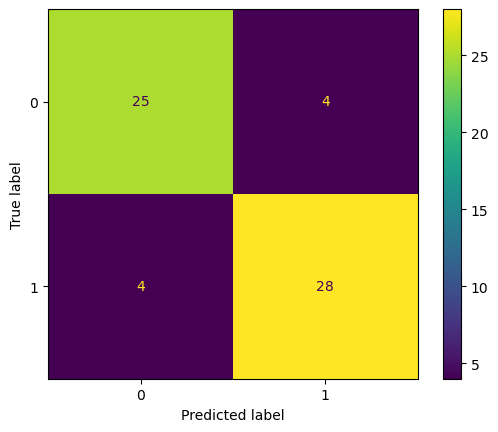

In [108]:
# confusion matrix result
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_preds = clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_preds);

from the above confusion matrix, it is visible that the model is performing well, as the quanitity of false results is much lower than true results.

#### Other Evaluation Metrics

In [109]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



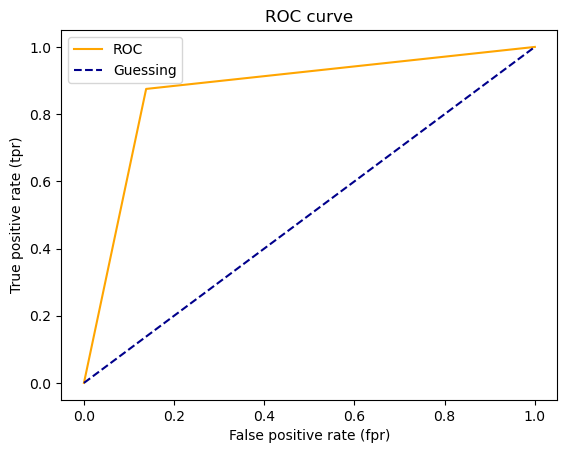

In [110]:
# ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr, color="orange", label="ROC");
plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing");

# customizing the plot
plt.xlabel("False positive rate (fpr)");
plt.ylabel("True positive rate (tpr)");
plt.title("ROC curve");
plt.legend();

In [111]:
# AUC score
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_preds)
print(f"ROC AUC score: {roc_auc}")

ROC AUC score: 0.8685344827586206


## Comparison with other models
Other models we will use are 
* LogisticRegression (yes, it is for classification)
* K-Nearest Neighbors
* Random Forest Classifier

### Logistic Regression

In [112]:
# importing other models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [113]:
other_models = {"Logistic Regression": LogisticRegression(max_iter=1000),
                "KNN": KNeighborsClassifier(),
                "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    other_models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    
    # set random seed
    np.random.seed(42)
    
    # make a dictionary to keep model scores
    model_scores = {}
    
    # loop through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, y_train)
        # evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [114]:
other_model_scores = fit_and_score(other_models, 
                                   X_train, 
                                   X_test, 
                                   y_train, 
                                   y_test)


In [115]:
for name, score in other_model_scores.items():
    print(f"{name} accuracy: {score * 100:.2f}%")

Logistic Regression accuracy: 88.52%
KNN accuracy: 68.85%
Random Forest accuracy: 83.61%


Logistic Regression accuracy on test data is extremely respectable with 88.52%, making it the ideal candidate for our model.

### Model Comparison

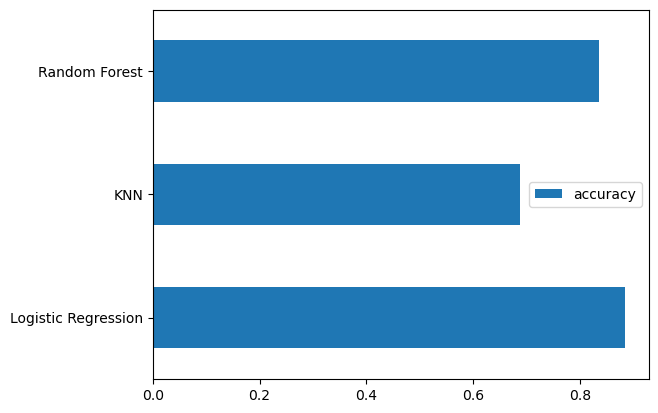

In [116]:
model_compare = pd.DataFrame(other_model_scores, index=["accuracy"])
model_compare.T.plot.barh();

Logistic Regression performed way better than all other models.

In [117]:
main_model = LogisticRegression(max_iter=1000)

# fitting the final model
main_model.fit(X_train, y_train)

# evaluating the final model
eval_main_model = main_model.score(X_test, y_test)
print(f"Evaluation of the model: {eval_main_model * 100:.2f}%")

Evaluation of the model: 88.52%


In [118]:
# cross-validation
cv_lr = cross_val_score(main_model, X, y, cv=5)  
print(f"mean cross-validation score: {cv_lr.mean()*100:.2f}%")

mean cross-validation score: 82.83%


#### Evaluation metrics
* Hyperparameter
* Cross-validation
* Feature importance
* Confusion Matrix
* Precision
* Recall
* F1 score
* ROC curve
* AUC

### Improving Logistic Regression Model

In [119]:
# using GridSearchCV to find optimal hyperparameters
from sklearn.model_selection import GridSearchCV

# making a grid for parameters
grid_cv_lr = {"solver": ["liblinear", "newton-cholesky"],
              "penalty": ["l2"],
              "tol": [1e-4, 1e-5, 1e-6],
              "C": [0.001, 0.01, 0.1, 1, 10]}

In [120]:
# applying GridSearchCV to create an efficient logistic regression model

lr_grid_model = GridSearchCV(LogisticRegression(max_iter=1000),
                             param_grid=grid_cv_lr, cv=5,
                             verbose=2,
                             n_jobs=-1,
                             scoring="accuracy")
lr_grid_model.fit(X_train, y_train)
lr_grid_model

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='accuracy', verbose=2)

In [121]:
lr_grid_model.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}

In [122]:
eval_score = lr_grid_model.score(X_test, y_test)
print(f"gridSearchCV model performed for accuracy: {eval_score * 100:.2f}%")

gridSearchCV model performed for accuracy: 86.89%


This 86.89% accuracy is over cross-validation of 5 folds.

This means the model is performing exceptionally well reaching accuracies near to 87%.

### Conclusion from Evaluation

We can conclude that our LinearSVC model wass performing well. But it will be safer to say that our model gives about 81% accuracy, rather than 86% accuracy as our cross-validation displays a mean of 81%.

However, the Logistic Regression Model used for Classification helped us achieve an accuracy of 86.89% over cross-validation mean hence proving the model worked outstandingly well considering a small dataset of just 303 samples.

## 6. Model Deployment

As we see our model fit for the test dataset, so we can deploy our model and use it on production.

In [123]:
# Saving a model with joblib
import joblib

# Saving the Logistic Regression Model using Joblib
joblib.dump(lr_grid_model, "heart-disease-prediction.joblib")

['heart-disease-prediction.joblib']

Now that our model has been saved, it can be used on production. an Example of this is given below.

## Model Example Usage

An example usage of our model is given below.

The initial cell is for creating a random data to test the model. It may be replaced with Practical data you may have.

In [124]:
# creating a random data record for predicting the target
test_record = X.copy()
test_record = test_record.iloc[0:1, :]

# choosing random values for features/can be modified to test the model
test_record['age'] = 50
test_record['sex'] = 1
test_record['cp'] = 3
test_record['trestbps'] = 147
test_record['chol'] = 270
test_record['fbs'] = 1
test_record['restecg'] = 0
test_record['thalach'] = 135
test_record['exang'] = 0
test_record['oldpeak'] = 2.7
test_record['slope'] = 0
test_record['ca'] = 0
test_record['thal'] = 1
test_record

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,50,1,3,147,270,1,0,135,0,2.7,0,0,1


The following cells show usage of model.
* First load the model with pickle library
* Then predict the target using the model

In [125]:
# Loading a model with pickle
model = joblib.load(open("heart-disease-prediction.joblib", "rb"))
model

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'newton-cholesky'],
                         'tol': [0.0001, 1e-05, 1e-06]},
             scoring='accuracy', verbose=2)

In [126]:
# predicting the target
model.predict(test_record)[0]

# 1 means that the person has heart disease
# 0 means that the person does not have heart disease


1

## 7. Model Maintenance

This section is for constant maintenance of the project, and will be updated as and when needed.

# Thank You for Visiting

This project was created by [Umar Zubairi](https://sites.google.com/view/telecomhub-uz)
- LinkedIn: https://www.linkedin.com/in/umar-zubairi/
- Email: engineerumarzubairi@gmail.com